# **IMPORTING LIBRARIES**

In [104]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **LOADING THE DATASET**

**READING THE DATASET**

In [105]:
#reading the dataset

df = pd.read_csv('diabetes.csv')

**DISPLAYING FIRST 5 RECORDS IN THE DATASET**

In [106]:
#first 5 records

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**PROBLEM STATEMENT**: 
*Our problem is to predict if a person is diabetic or not based on his body conditions( readings such as glucose, BP, BMI and so on) Since there are only 2 possible outcomes - diabetic or not (1 or 2), this is clearly a classification problem*

# **STATISTICS ON THE DATASET**

> **Statistics performed on the dataset to find missing values**

In [107]:
#statistics on the dataset to find null values

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> Since the count of all the columns are the same, there are no missing or null values

In [108]:
#number of rows and columns

df.shape

(768, 9)

> There are 768 records with 9 columns

**PROFILE REPORT**

In [109]:
#importing library Profile Report from Pandas Profiling library

# from pandas_profiling import ProfileReport

In [110]:
#Performing Profile Report on the dataset to get the entire statistical report of the dataset in a detailed manner

# ProfileReport(df)

> **From the above detailed report we can draw a few insights-**

> **There are a few zero columns in the dataset such as 'BMI','BloodPressure','Insulin','SkinThickness' and 'Glucose' which need to be handled**

# **FEATURE ENGINEERING**

**HANDLING MISSING VALUES**

> **We can replace the zero values in those 5 columns with their respective mean values as follows-**

In [111]:
#replacing the zero values with the mean values

df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BMI'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['BMI'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['BMI'].mean())

In [112]:
#let us check if we have handled the zero values

# ProfileReport(df)

> **All the zero values have been handled by replacing them with their respective mean values**

# **DATA VISUALIZATION**

> **Let us check for outliers in the dataset and the graph is a boxplot**

**BOXPLOT**

<Axes: >

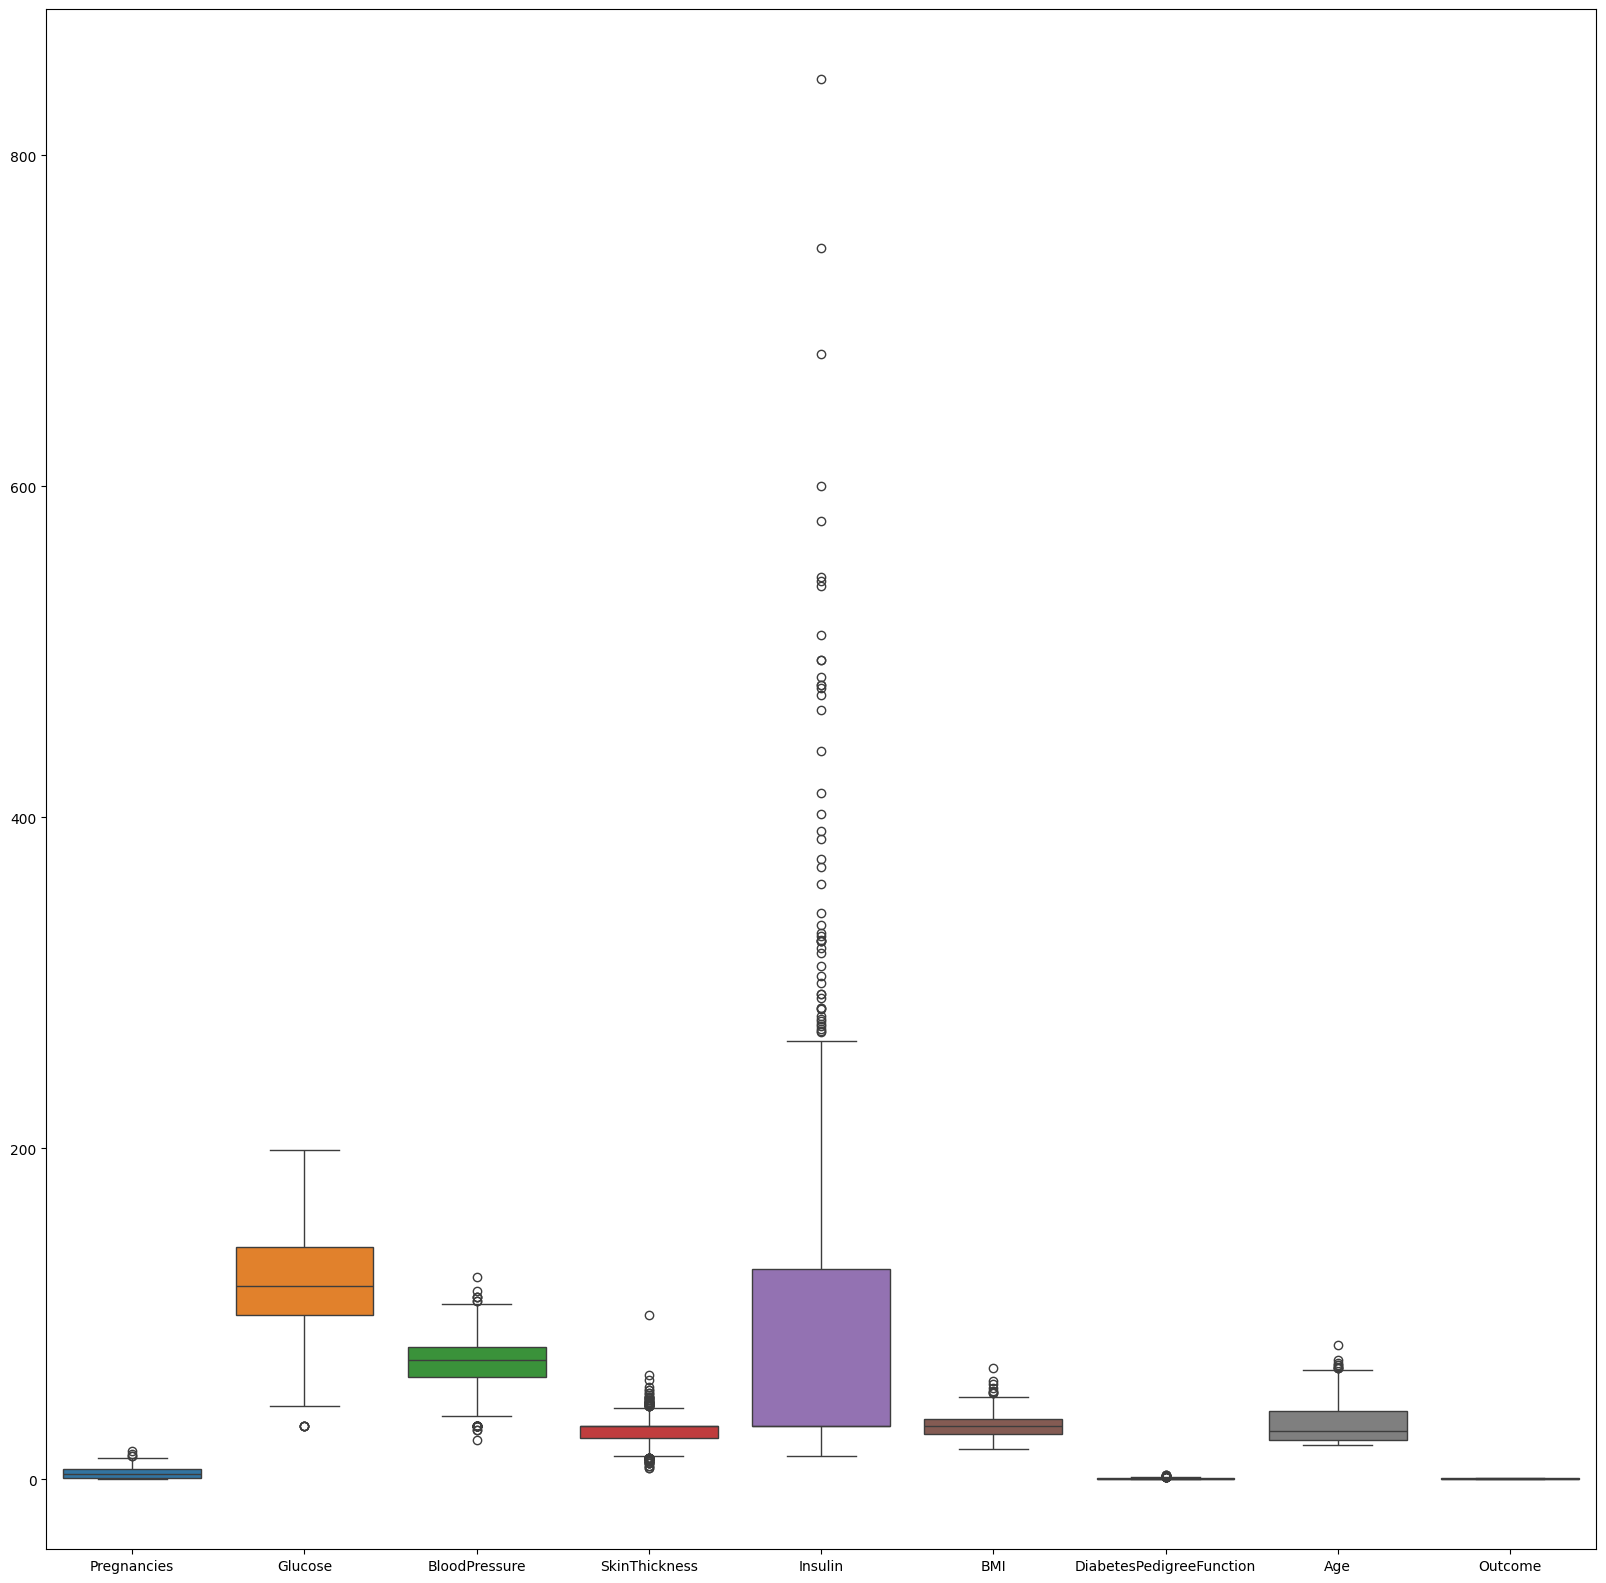

In [113]:
#boxplot visualization

fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

> **There are multiple outliers in the 'Insulin' column of the dataset mostly. These need to be handled

**HANDLING OULIERS**

> **For handling outliers, we can select a specific quantile range and then, we can later discard the rest as outliers which fall above this range**

In [114]:
#let us choose 70% as our quantile range and any datapoints above this range would be considered outliers

q= df['Insulin'].quantile(0.70)
q

106.0

> ***Let us Create a new dataframe which consists of all the datapoints only within the 95% quantile range , while we eliminate the rest***

In [115]:
#create dataframe to that eliminates the outliers

df_new = df[df['Insulin'] < q]

In [116]:
#displaying the new dataframe without outliers

df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31,0
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,32.450805,32.450805,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.000000,32.450805,44.0,0.403,43,1
762,9,89.0,62.0,32.450805,32.450805,22.5,0.142,33,0
764,2,122.0,70.0,27.000000,32.450805,36.8,0.340,27,0
766,1,126.0,60.0,32.450805,32.450805,30.1,0.349,47,1


<Axes: >

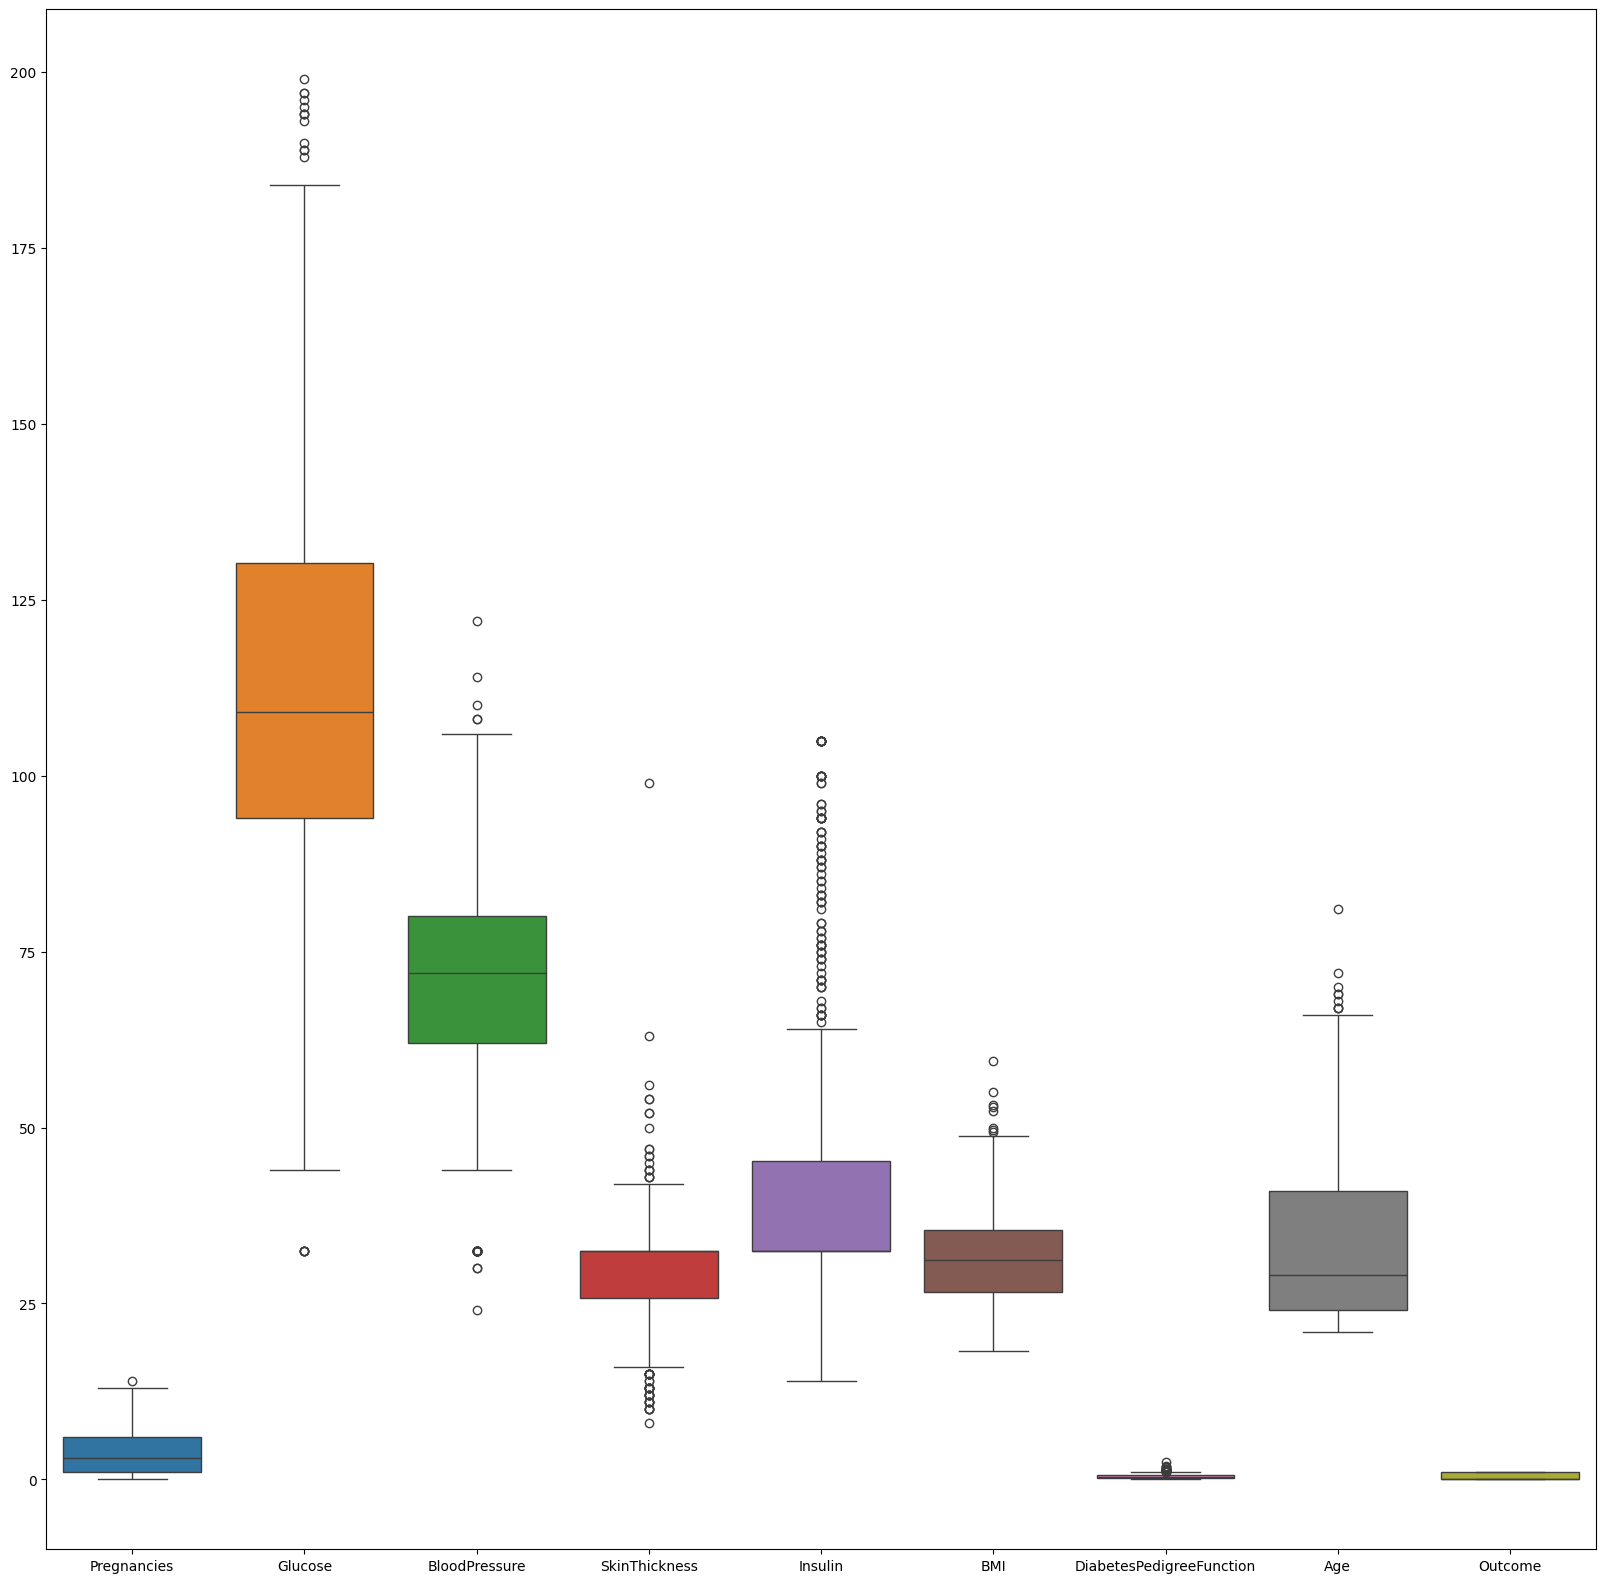

In [117]:
#verifying with the boxplot

fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new, ax = ax)

> This is the old dataset with 768 records

In [118]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31,0
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,32.450805,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,32.450805,32.450805,30.1,0.349,47,1


> This is the new record with 536 records (we are losing some data of course- like 30% (100-70=30)

In [119]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31,0
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,32.450805,32.450805,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.000000,32.450805,44.0,0.403,43,1
762,9,89.0,62.0,32.450805,32.450805,22.5,0.142,33,0
764,2,122.0,70.0,27.000000,32.450805,36.8,0.340,27,0
766,1,126.0,60.0,32.450805,32.450805,30.1,0.349,47,1


***So far, we have handled only 'Insulin' column . Let us follow the same technique to handle the outliers in the other columns as well setting different quantile ranges as required***

**1. Handling 'Pregnancies' outliers**

In [120]:
#pregnancies -- has minor small outliers
q = df['Pregnancies'].quantile(0.98)  #selecting q range as 98%
df_new = df[df['Pregnancies'] < q]

**2. Handling 'BMI' outliers**

In [121]:
#BMI outliers
q = df['BMI'].quantile(0.99)  #selecting q range as 99%
df_new = df[df['BMI'] < q]

**3. Handling 'SkinThickness' outliers**

In [122]:
#skinthickness outliers
q = df['SkinThickness'].quantile(0.99)  #selecting q range as 99%
df_new = df[df['SkinThickness'] < q]

**4. Handling 'Insulin' outliers**

In [123]:
#insulin outliers
q = df['Insulin'].quantile(0.95)  #selecting q range as 95%
df_new = df[df['Insulin'] < q]

**5. Handling 'DiabetesPedigreeFunction' outliers**

In [124]:
#diabetes pedigree function outliers
q = df['DiabetesPedigreeFunction'].quantile(0.99)  #selecting q range as 99%
df_new = df[df['DiabetesPedigreeFunction'] < q]

**6. Handling 'Age' outliers**

In [125]:
#age
q = df['Age'].quantile(0.99)  #selecting q range as 99%
df_new = df[df['Age'] < q]

> **Let us now check if we have handled the outliers using the boxplot**

In [126]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31,0
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,32.450805,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,32.450805,32.450805,30.1,0.349,47,1


<Axes: >

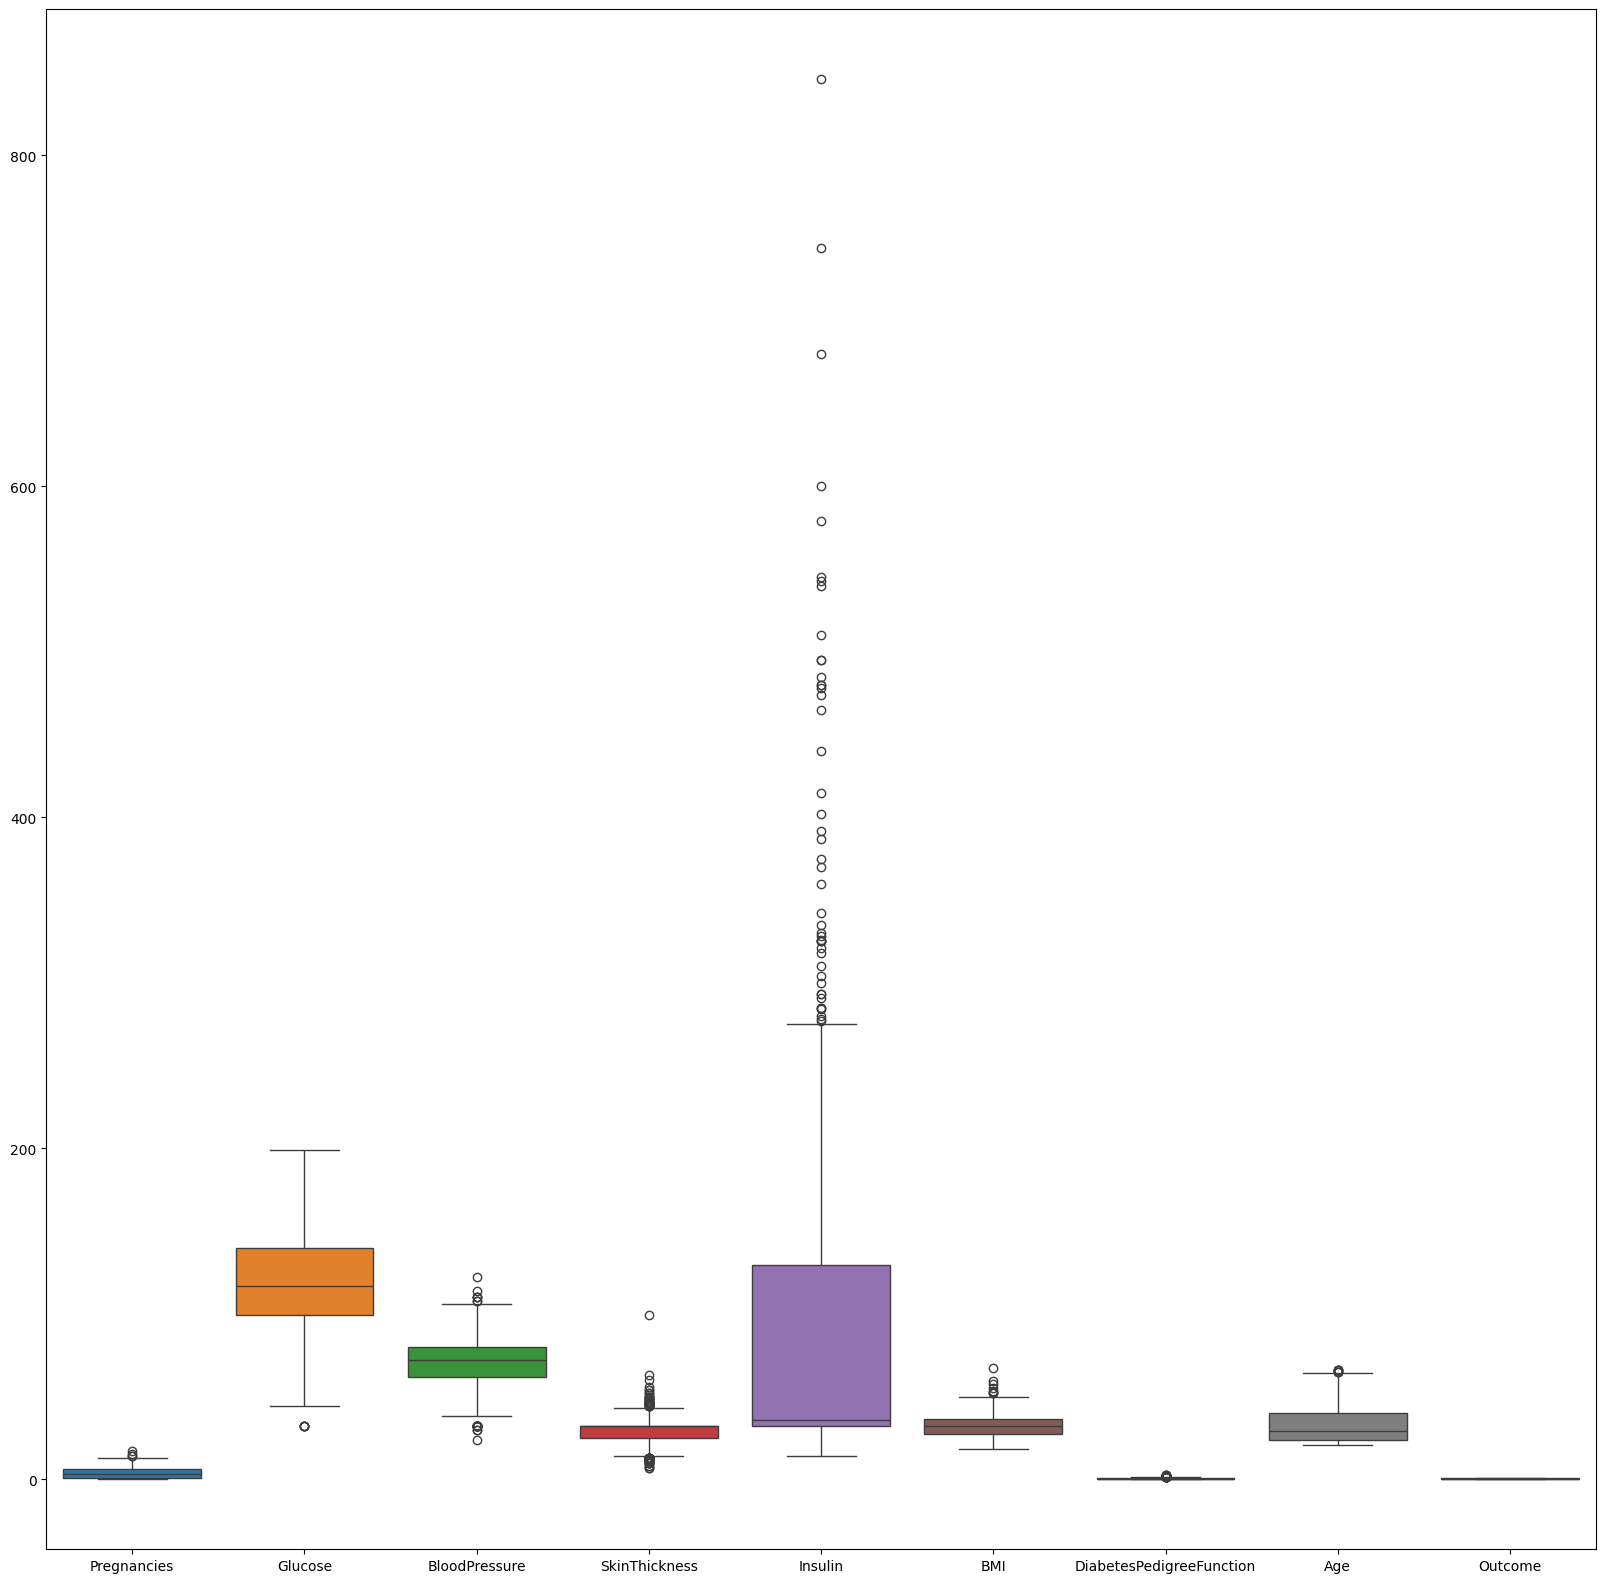

In [127]:
#Checking if outliers are handled using Boxplot visualization

fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new, ax = ax)

> Let us remove rest of the outliers by writing one user definede function and remove them

In [128]:
#function to remove rest of the outliers
def outlier_removal(self,data):
    def outlier_limits(col):
        q3,q1 = np.nanpercentile(col,[75,25])
        IQR = q3 - q1
        UL = q3 + 1.5* IQR
        LL = q1 - 1.5* IQR
        return UL, LL
    for column in data.columns:
        if data[column].dtype!= 'int64':
            UL,LL = outlier_limits(data[column])
            data[column] = np.where(data[column]> UL | data[column]< LL, np.nan,data[column])
    return data

<Axes: >

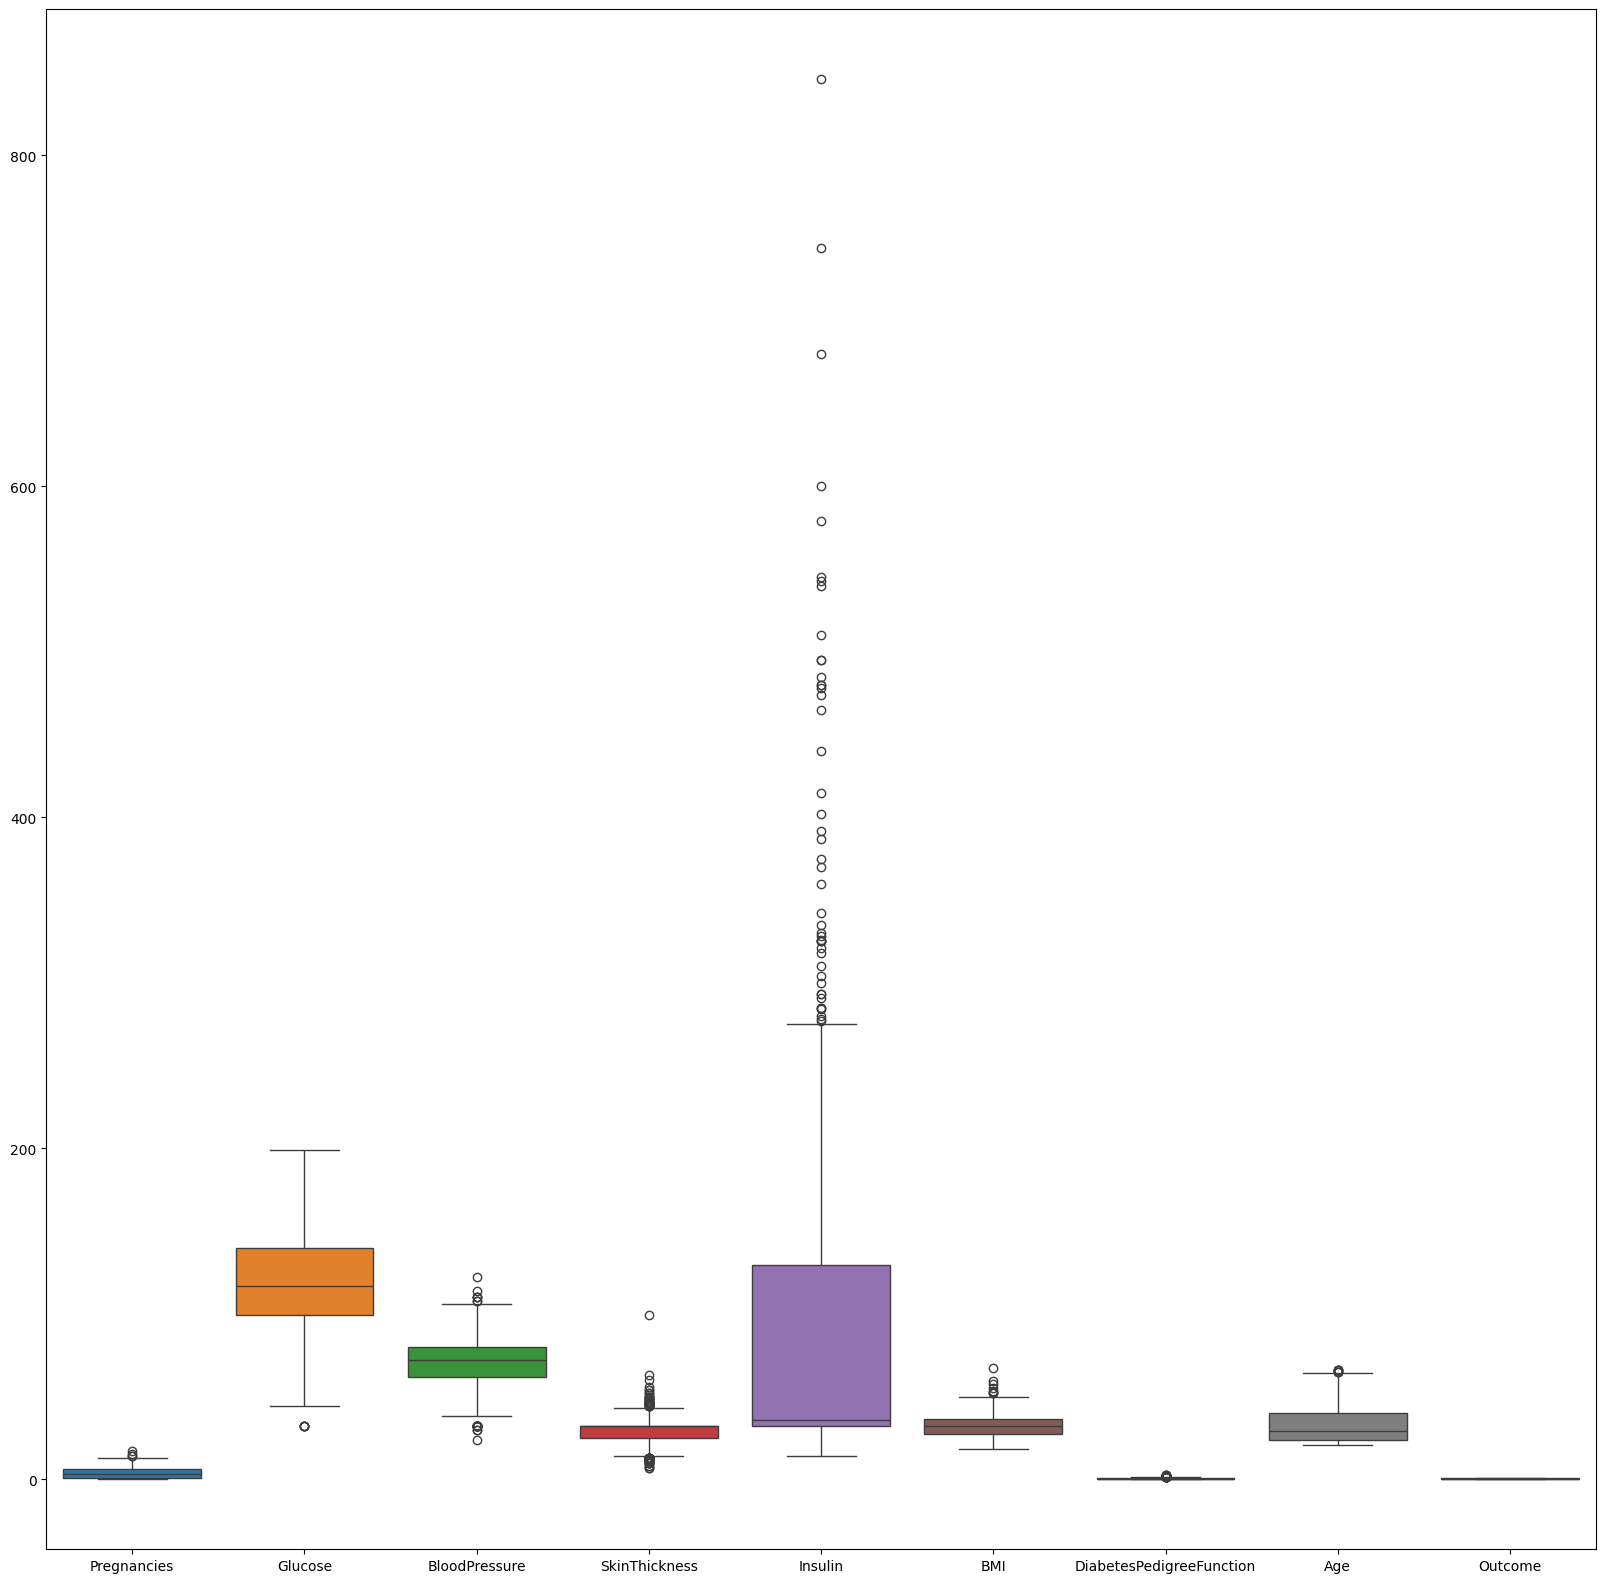

In [129]:
#Checking if outliers are handled using Boxplot visualization

fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new, ax = ax)

> **Successfully handled all outliers**

In [130]:
# ProfileReport(df_new)

# **SPLITTING THE FEATURES AND LABEL**

In [131]:
#splitting dataset into features and label

x = df_new.drop(columns=['Outcome'])  #features
y = df_new['Outcome'] #labels

In [132]:
#features

x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,32.450805,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,32.450805,32.450805,30.1,0.349,47


In [133]:
#target variable

y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 759, dtype: int64

# **STANDARDIZATION**

> **Importing StandardScaler from the sklearn library - Standardization is perfomed on the dataset so as to bring all the values in the dataset to the same range for an easier manipulation (Mean = 0 and SD =1)**

Since are dataset range is flunctuating (insulin min-15 and max-291 and so on) hence Standardization is necessary here

**IMPORT LIBRARY**

In [134]:
#importing library


from sklearn.preprocessing import StandardScaler

**MODEL BUILDING**

In [135]:
#creating model

# scaler = StandardScaler()

**FITTING THE MODEL**

In [136]:
#fitting the model with the features

# x_scaled = scaler.fit_transform(x)
x_scaled = x.values

In [137]:
#displaying the scaled values

x_scaled

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

**Boxplot of the scaled values - variance and the the complete dispersion is chnaged and in the same scale now aftee standardization**

<Axes: >

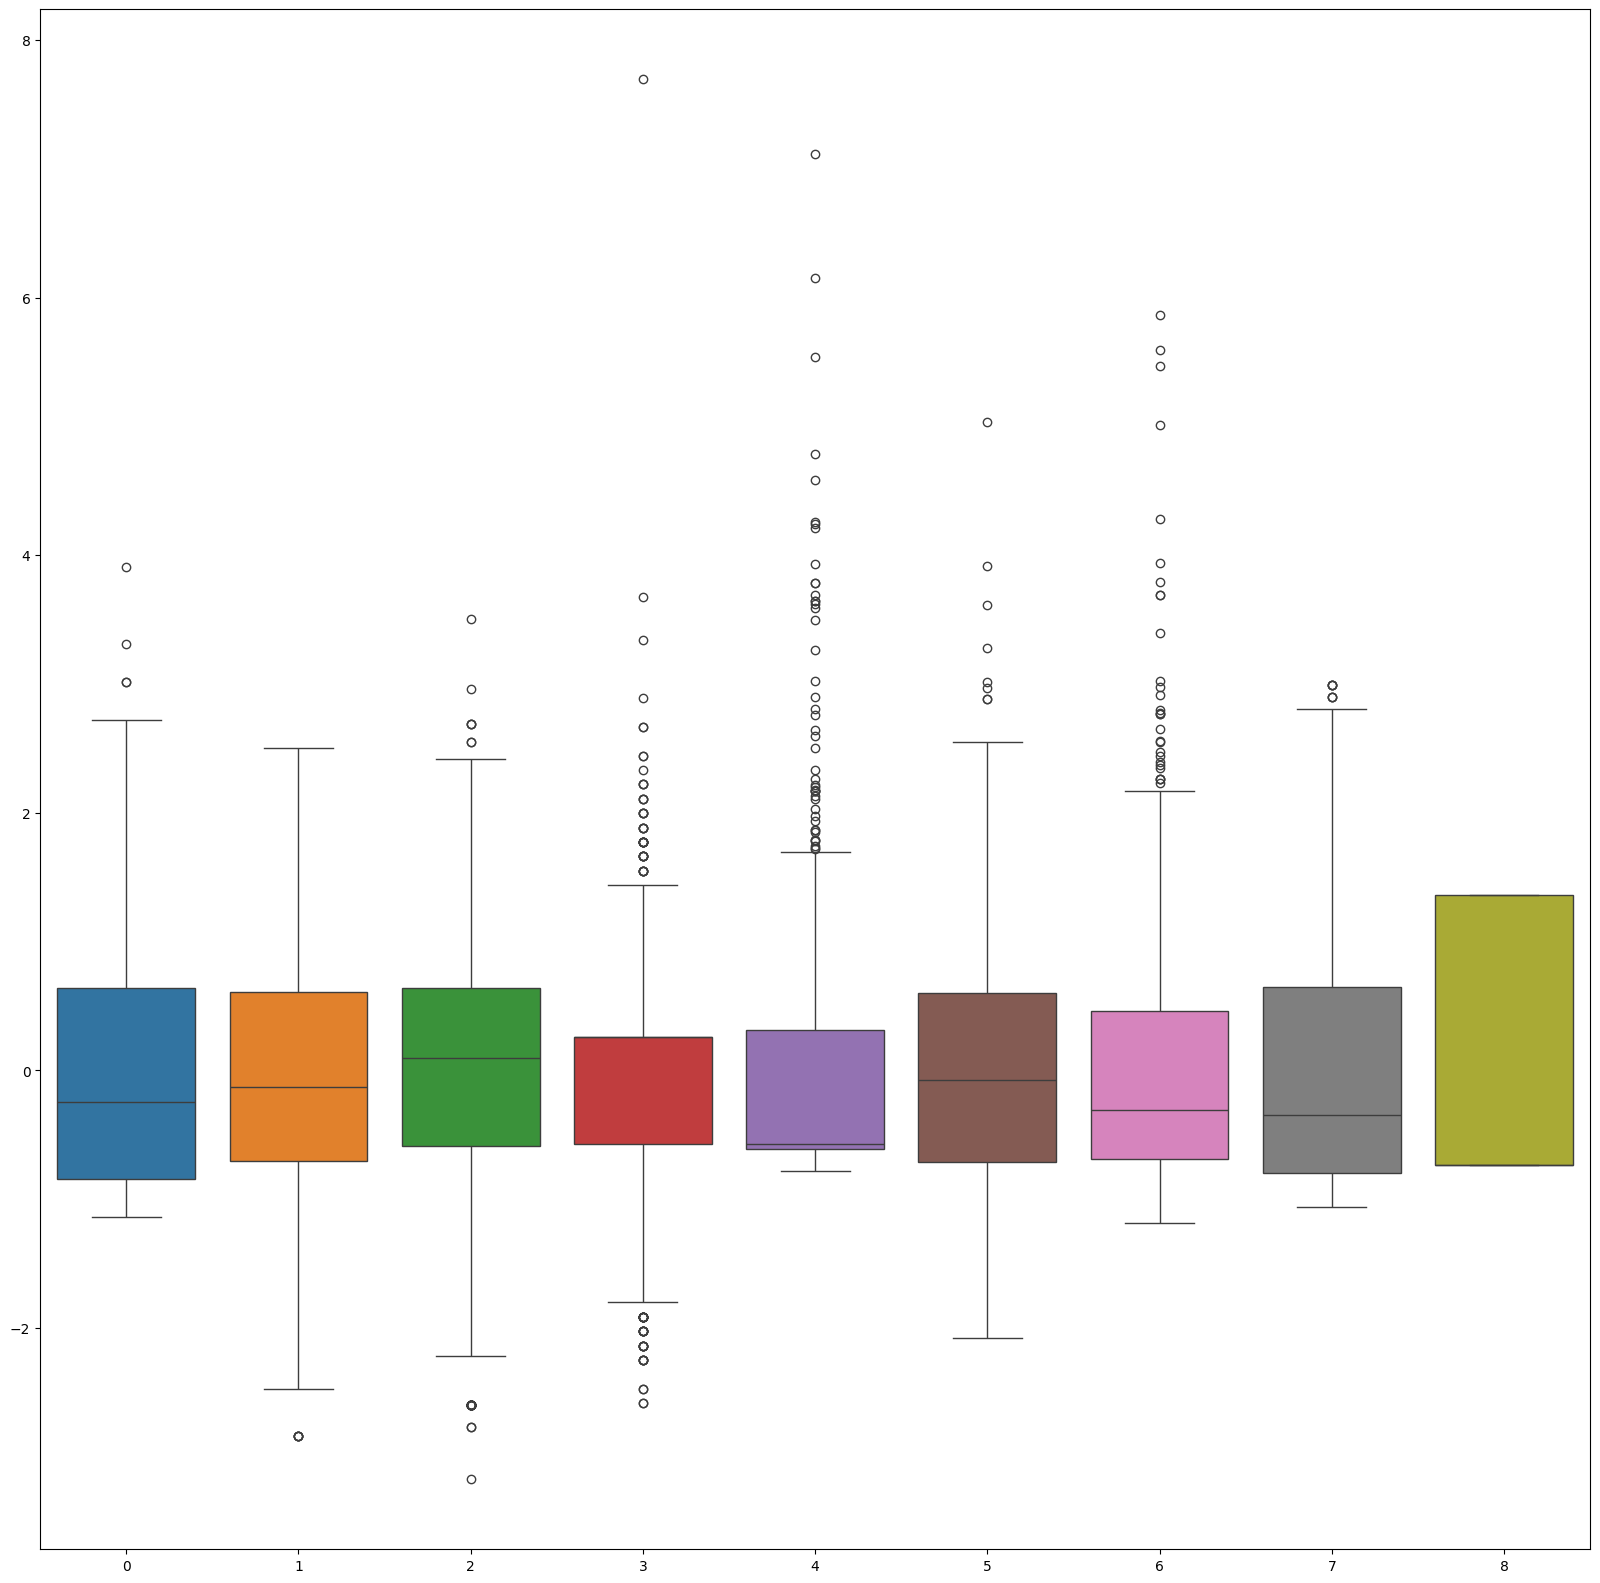

In [138]:
#dispersion is of the same scale

df_new_scalar = pd.DataFrame(scaler.fit_transform(df_new))
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new_scalar , ax = ax)

> **Dispersion is the same since all values are scaled**

# **MULTICOLLINEARITY CHECK**

> **Let us use Variance Inflation Factor (VIF) to check for multi collinearity among the features and eliminate the thos efeatures which are collinear since they wouldn't contribute much to the model building**

**IMPORTING LIBRARY**

In [139]:
#importing VIF from statsmodel library

from statsmodels.stats.outliers_influence import variance_inflation_factor

**VARIANCE INFLATION FACTOR (VIF)**

> **Creating a dataframe to store the VIF values of all the features in the dataset**

In [140]:
#creating a dataframe vif

vif = pd.DataFrame()

> **storing all the scaled feature values along with their respective column names**

In [141]:
#storing all the scaled feature values in the created dataframe 

vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

In [142]:
vif

,vif,features
0,3.380856,Pregnancies
1,19.200842,Glucose
2,22.871673,BloodPressure
3,17.525861,SkinThickness
4,2.191112,Insulin
5,30.582684,BMI
6,3.167139,DiabetesPedigreeFunction
7,16.058555,Age


> **There is no multi collinearity among the features since the VIF score is almost in the same range and hence no elimination of the features is required for model creation**

# **TRAIN TEST SPLIT**

> **Let us split the dataset into train and test set such that 20% of the dataset is for training while the rest (80%) is for testing**

**IMPORTING LIBRARY**

In [143]:
#importing train test split from sklearn library

from sklearn.model_selection import train_test_split

In [144]:
#train test split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.20,random_state=144) 

In [145]:
#ytrain set

x_train

array([[  2.   , 112.   ,  86.   , ...,  38.4  ,   0.246,  28.   ],
       [  0.   , 108.   ,  68.   , ...,  27.3  ,   0.787,  32.   ],
       [ 10.   , 122.   ,  78.   , ...,  27.6  ,   0.512,  45.   ],
       ...,
       [  6.   , 125.   ,  68.   , ...,  30.   ,   0.464,  32.   ],
       [  1.   , 100.   ,  72.   , ...,  25.3  ,   0.658,  28.   ],
       [  5.   , 189.   ,  64.   , ...,  31.2  ,   0.583,  29.   ]])

In [146]:
#for model validation

x_test

array([[  3.        , 111.        ,  62.        , ...,  22.6       ,
          0.142     ,  21.        ],
       [  1.        ,  32.45080516,  74.        , ...,  27.7       ,
          0.299     ,  21.        ],
       [  1.        ,  88.        ,  30.        , ...,  55.        ,
          0.496     ,  26.        ],
       ...,
       [  3.        , 130.        ,  64.        , ...,  23.1       ,
          0.314     ,  22.        ],
       [ 10.        , 125.        ,  70.        , ...,  31.1       ,
          0.205     ,  41.        ],
       [  6.        , 119.        ,  50.        , ...,  27.1       ,
          1.318     ,  33.        ]])

# **LOGISTIC REGRESSION**

**IMPORTING LOGISTIC REGRESSION FROM SKLEARN LIBRARY**

In [147]:
#importing logistic regression from sklearn library


from sklearn.linear_model import LogisticRegression

**MODEL BUILDING**

In [148]:
#creating a logistic regression model using liblinear solver

logi_liblinear = LogisticRegression(verbose=1,n_jobs=4,solver='liblinear')

> **Solver** - algorithm to used in a n optimization problem - this decides the max number of iterations that can be sent to our model (types - liblnear,saga,lbfgs,newton-cg). Here in our problem we are using 'liblinear' (used for small datasets for only OVO (binary class) - does not support OVR(multi-class)) which supports L1 and L2 regularization by itself

> **Verbose** - Internal operations that happens can be displayed using verbose 

> **n_jobs** -number of jobs restricts no. od CPU/GPU and controls the resources that are to be allocated so that computer can execute some other task as well 

*Loss function used in OVR (multi class classification ) = categorical cross entropy*

**FITTING THE MODEL**

In [149]:
#fitting the model

logi_liblinear.fit(x_train,y_train)

[LibLinear]

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


LogisticRegression(n_jobs=4, solver='liblinear', verbose=1)

**MODEL PREDICTION**

> **For prediction let us take the 1st record in our dataset, and check what our models predicts**

**1. LibLinear model**

In [150]:
#let us take the second records for example --> expected is 0

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31,0
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [151]:
logi_liblinear.predict([x_test[1]])

array([0], dtype=int64)

> our model is predicting zero corrcetly as expected

In [152]:
logi_liblinear.predict_proba([x_test[1]])

array([[0.98613563, 0.01386437]])

> prediction probability shows that class 0 has 99% probablity and class 1 has just 0.04% probabilty hence zero is the outcome

In [153]:
logi_liblinear.predict_log_proba([x_test[1]])

array([[-0.01396138, -4.27843287]])

> log probability is shown for both classes 0 and 1 

**2. lbfgs model**

In [154]:
#creating a logistic regression model using lbfgs solver which is the default one

logi = LogisticRegression(verbose=1,n_jobs=4,solver='lbfgs')

In [155]:
logi.fit(x_train,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


LogisticRegression(n_jobs=4, verbose=1)

> **We have built two models (logi and logi_liblinear), let us compare thier accuracies**

# **CONFUSION MATRIX**

**IMPORT LIBRARIES**

In [156]:
#importing from sklearn library

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

**PREDICTIONS FOR BOTH MODELS**

In [157]:
#liblinear model predictions - model1

y_pred_liblinear = logi_liblinear.predict(x_test)
y_pred_liblinear

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [158]:
#lbfgs model predictions- model2

y_pred_default = logi.predict(x_test)
y_pred_default

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

**CONFUSION MATRIX**

In [159]:
#confusion matrix for model1

confusion_matrix(y_test,y_pred_liblinear)

array([[83, 11],
       [27, 31]], dtype=int64)

In [160]:
#confusion matrix for model2

confusion_matrix(y_test,y_pred_default)

array([[81, 13],
       [26, 32]], dtype=int64)

**EVALUATION METRICS (ACCURACY SCORE , PRECISON, RECALL, SPECIFICITY & F1 SCORE)**

In [161]:
#user defined function for evaluation metrics

def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result
model_eval(y_test,y_pred_liblinear)

{'Accuracy': 0.75,
 'Precision': 0.7380952380952381,
 'Recall': 0.5344827586206896,
 'Specficity': 0.8829787234042553,
 'F1': 0.62}

> evaluation metrics for model 1 are printed

In [162]:
model_eval(y_test,y_pred_default)

{'Accuracy': 0.743421052631579,
 'Precision': 0.7111111111111111,
 'Recall': 0.5517241379310345,
 'Specficity': 0.8617021276595744,
 'F1': 0.6213592233009709}

> evaluation metrics for model 2 are printed

**Both have all the evaluation metrics almost the same**

In [163]:
import pickle

# Assuming your decision tree model is named 'dt_model'
# Save the model to a pkl file using pickle
with open('diabetes.pkl', 'wb') as file:
    pickle.dump(logi, file)


# **ROC & AUC**

**1. Liblinear model**

In [164]:
#ROC AUC

roc_auc_score(y_test,y_pred_liblinear)

0.7087307410124725

> AUC (area under the curve) is 71.53% 

In [165]:
#ROC curve 

roc_curve(y_test,y_pred_liblinear)

(array([0.        , 0.11702128, 1.        ]),
 array([0.        , 0.53448276, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [166]:
#PLOTTING GRAPH for model 1

fpr,tpr,thresholds = roc_curve(y_test,y_pred_liblinear)
auc = roc_auc_score(y_test,y_pred_liblinear)

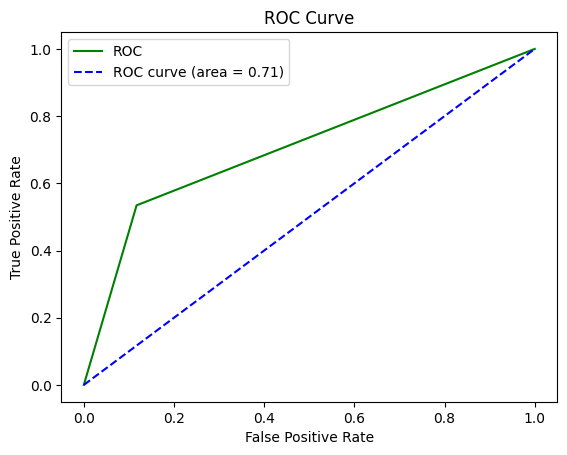

In [167]:
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

>  AUC (area under the curve) which is 72% is plotted and is depicted in the graph

**2. Lbfgs model**

In [168]:
#ROC AUC

roc_auc_score(y_test,y_pred_default)

0.7067131327953045

> AUC (area under the curve) is 71.53%

In [169]:
#ROC curve

roc_curve(y_test,y_pred_default)

(array([0.        , 0.13829787, 1.        ]),
 array([0.        , 0.55172414, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [170]:
#PLOTTING GRAPH for model 2

fpr,tpr,thresholds = roc_curve(y_test,y_pred_default)
auc = roc_auc_score(y_test,y_pred_default)

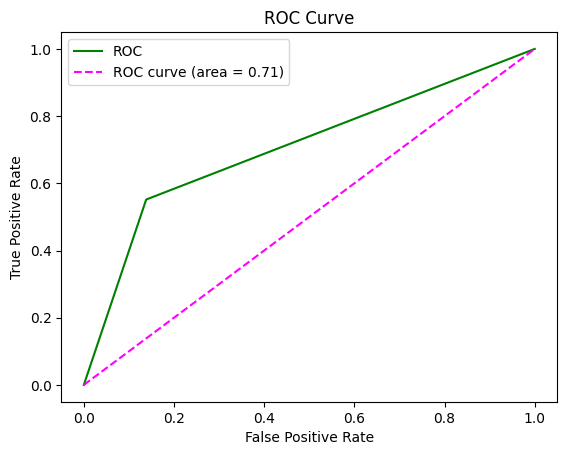

In [171]:
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

> AUC (area under the curve) which is 72% is plotted and is depicted in the graph

> **Both models have the same AUC so it does not matter which one you choose (in other cases it is the best option to choose the model with the maximum AUC)**

In [172]:
# import pandas as pd

# data = [3, 6, 5, 6, 77, 6, 5, 4]
# columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# df = pd.DataFrame([data], columns=columns)

# # If you want to add a default index:
# # df = pd.DataFrame([data], columns=columns, index=[1])
